# Project Group 35

Members: Mathijs Kop, Roos Wentges, Irene Bosman, Sathvik Gadiraju, Sophie Pijnenburg

Student numbers: 5095433, 4869419 , 4882237, 6084435 , 4851404

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Research question: What relation can be found between rising fuel costs and mobility behaviour?

We are going to look at gas fuel prices and how it influences the travel behaviour (eg. work, leisure) in the years 2018 to 2022. The fuel prices have increased so we want to see if some travel motives have a clear connection to this. For example, travelling for work might not have changed as much because people get compensation for travelling but maybe for vacations or spare time, behaviour might have changed. If we find a correlation we can look into this in more detail to see if it is a coincidence or if it is actually connected


Subquestions:
- How have fuel prices developed in the considered time in the Netherlands?
- How have the mobility motives developed in the considered time in the Netherlands?
- What is the general mobility trend?
- What is the correlation between the fuel prices and the mobility motives?

 
Geographical boundary: The Netherlands

Time scale:  2018-2022

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

CBS: https://opendata.cbs.nl/#/CBS/en/dataset/84710ENG/table?ts=1696337832049
https://opendata.cbs.nl/#/CBS/en/dataset/80416ENG/table?ts=1696337975859
https://opendata.cbs.nl/statline/#/CBS/en/dataset/84755ENG/table?ts=1696338796089

# Data Pipeline

From the first link we will look into distance traveled in passenger kilometres for different travel motives. 
From the second link we will look into the mean fuel prices per year, to compare with the distance traveled. The third link can be used to find the general mobility trend for the different travel motives over the years. 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import warnings

In [14]:
from pandas import read_csv

# Subquestion 1: How have fuel prices developed in the considered time in the Netherlands?

In [15]:

df= read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = df.dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)

data.index.names = ['Months']

data.index = pd.to_datetime(data.index)

warnings.filterwarnings("ignore", message="The argument 'infer_datetime_format' is deprecated.*", category=FutureWarning) #ignore warning

data['Average'] = data.mean(axis=1) #Add Average price 
data.head(10)

,Euro95,Diesel,LPG,Average
Months,,,,
2018-01-01,1.589,1.292,0.696,1.192333
2018-02-01,1.566,1.254,0.667,1.162333
2018-03-01,1.545,1.260,0.654,1.153000
2018-04-01,1.608,1.301,0.663,1.190667
2018-05-01,1.668,1.360,0.675,1.234333
2018-06-01,1.660,1.362,0.681,1.234333
2018-07-01,1.661,1.356,0.688,1.235000
2018-08-01,1.683,1.359,0.692,1.244667
2018-09-01,1.680,1.384,0.714,1.259333


Text(0.5, 1.0, 'Fuel prices per month')

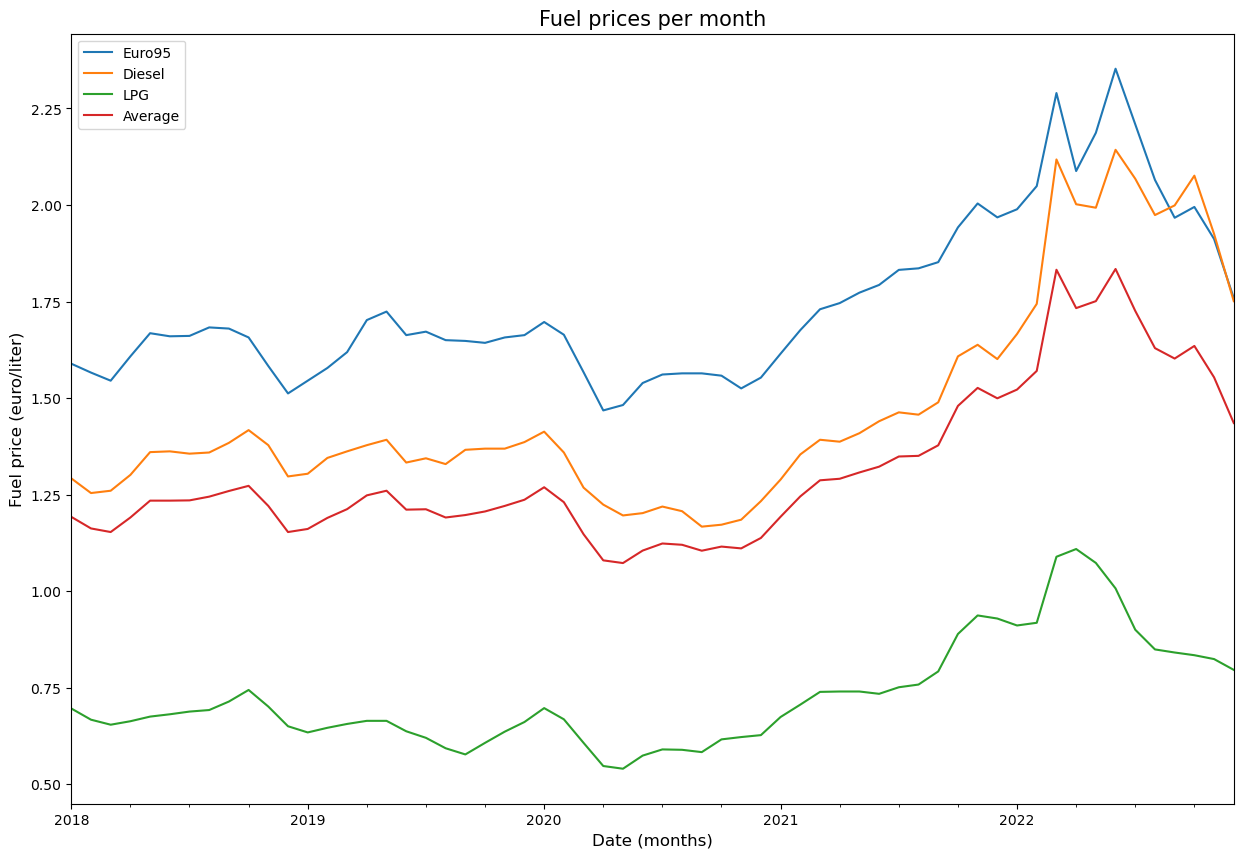

In [12]:
data.plot(figsize=(15,10))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month', fontsize=15)